# EE386 Digital Signal Processing Lab

## Experiment 3

In [1]:
import numpy as np
import IPython

from scipy import fftpack
from scipy import signal as sp
from scipy.io import wavfile
from scipy.signal import find_peaks

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

In [2]:
def get_signal(filename):
  Fs, s = wavfile.read(filename)
  print('sampling rate: {}Hz'.format(Fs))
  IPython.display.Audio(s, rate=Fs)
  return Fs, s

In [3]:
# Loading the data
Fs, s_flute3 = get_signal('flute3.wav')
Fs, s_piano3 = get_signal('piano3.wav')
Fs, s_trumpet3 = get_signal('trumpet3.wav')
Fs, s_violin3 = get_signal('violin3.wav')

sampling rate: 11025Hz
sampling rate: 11025Hz
sampling rate: 11025Hz
sampling rate: 11025Hz


In [4]:
def plot_signal(x, xaxis_label=None, yaxis_label=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)    
    return

In [5]:
def normalize(s):
  mean = np.mean(s)
  std = np.std(s)
  s = (s - mean) / std
  return s

In [6]:
# Normalize all the signals
s_flute3norm = normalize(s_flute3)
s_piano3norm = normalize(s_piano3)
s_trumpet3norm = normalize(s_trumpet3)
s_violin3norm = normalize(s_violin3)

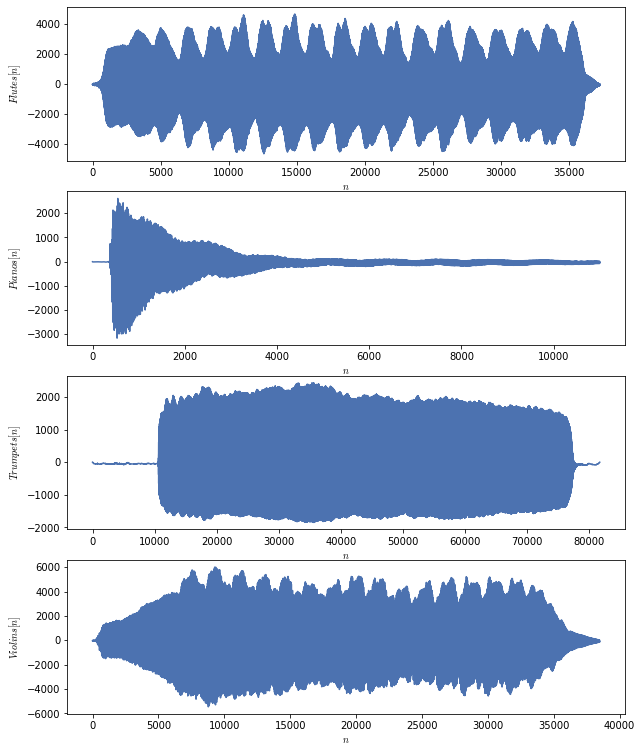

In [7]:
# Plotting the signals
fig = plt.figure(figsize=(10, 13))

fig.add_subplot(4, 1, 1)
plot_signal(s_flute3, xaxis_label=r'$n$', yaxis_label=r'$Flute  s[n]$')

fig.add_subplot(4, 1, 2)
plot_signal(s_piano3, xaxis_label=r'$n$', yaxis_label=r'$Piano  s[n]$')

fig.add_subplot(4, 1, 3)
plot_signal(s_trumpet3, xaxis_label=r'$n$', yaxis_label=r'$Trumpet  s[n]$')

fig.add_subplot(4, 1, 4)
plot_signal(s_violin3, xaxis_label=r'$n$', yaxis_label=r'$Violin  s[n]$')

In [8]:
def plot_spec(ylabel, x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.ylabel("Amplitude "+ylabel)
    return N, X

Text(0.5, 0, '$Frequency (Hz)$')

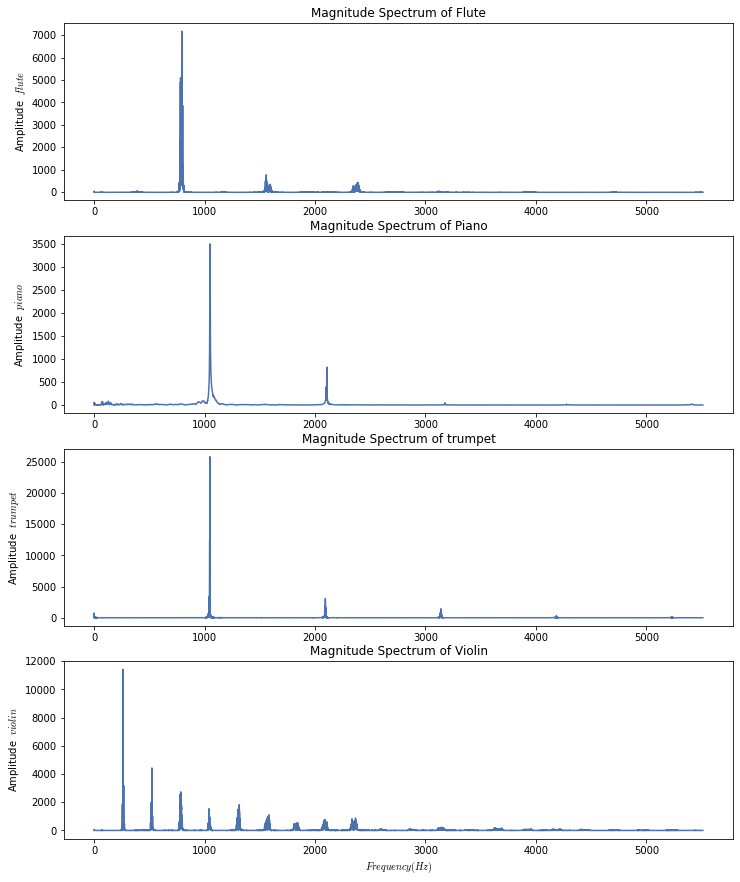

In [10]:
plt.figure(figsize=(12, 15))

plt.subplot(4, 1, 1)
plt.title("Magnitude Spectrum of Flute", fontsize=12)
plot_spec(' $flute$', s_flute3norm, Fs, Fs/2)

plt.subplot(4, 1, 2)
plt.title("Magnitude Spectrum of Piano", fontsize=12)
plot_spec(' $piano$', s_piano3norm, Fs, Fs/2)

plt.subplot(4, 1, 3)
plt.title("Magnitude Spectrum of trumpet", fontsize=12)
plot_spec(' $trumpet$', s_trumpet3norm, Fs, Fs/2)

plt.subplot(4, 1, 4)
plt.title("Magnitude Spectrum of Violin", fontsize=12)
plot_spec(' $violin$', s_violin3norm, Fs, Fs/2)
plt.xlabel("$Frequency (Hz)$")

In [11]:
def plot_spec_db(ylabel, x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    X = 20*np.log10(X)
    plt.plot(N, X)
    plt.ylabel(r'$Amplitude  $'+ylabel+ '$ (dB)$', size=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    return N, X

Text(0.5, 0, '$Frequency (Hz)$')

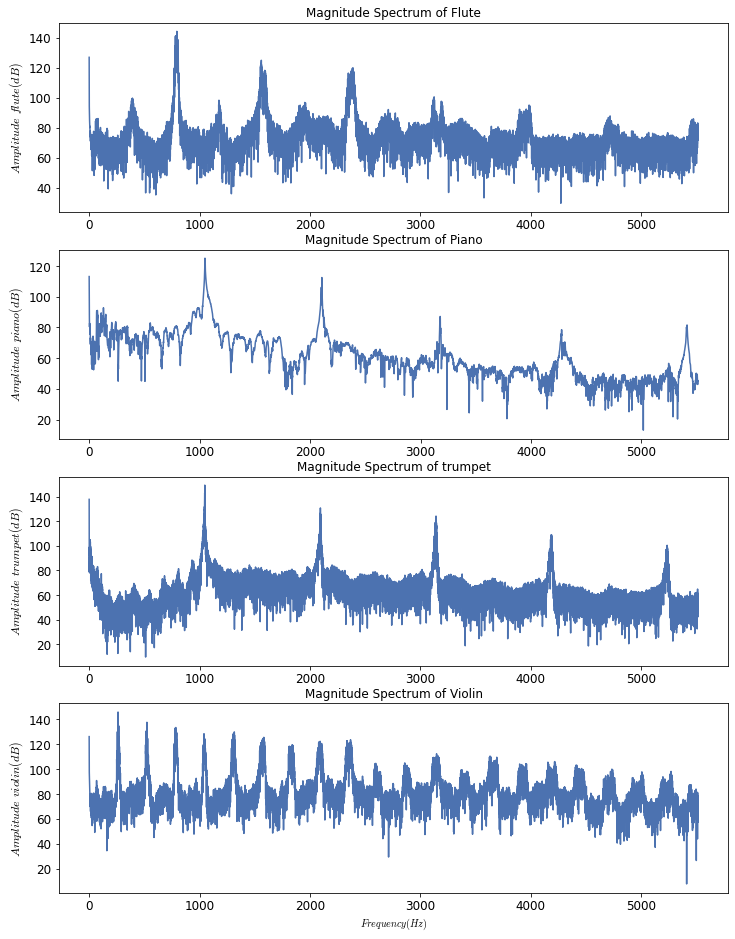

In [15]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.title("Magnitude Spectrum of Flute", fontsize=12)
plot_spec_db(' $flute$', s_flute3, Fs, Fs/2)

plt.subplot(4, 1, 2)
plt.title("Magnitude Spectrum of Piano", fontsize=12)
plot_spec_db(' $piano$', s_piano3, Fs, Fs/2)

plt.subplot(4, 1, 3)
plt.title("Magnitude Spectrum of trumpet", fontsize=12)
plot_spec_db(' $trumpet$', s_trumpet3, Fs, Fs/2)

plt.subplot(4, 1, 4)
plt.title("Magnitude Spectrum of Violin", fontsize=12)
plot_spec_db(' $violin$', s_violin3, Fs, Fs/2)
plt.xlabel("$Frequency (Hz)$")

In [23]:
# Finding the frequency value for each fft spectrum
def fundamental_freq(instrument, sbplot, s, Fs, threshold):
  plt.subplot(4, 1, sbplot)
  plt.title("Peaks in FFT plot of " + instrument)
  N, X = plot_spec(instrument, s, Fs, Fs/2)
  peaks, _ = find_peaks(X, threshold= threshold)
  plt.plot(N[peaks], X[peaks], 'rx')
  print("Fundamental frequency of " + instrument + " is = " + str(N[peaks[0]]))

Fundamental frequency of Flute 3 is = 793.5040268456376
Fundamental frequency of Piano 3 is = 1048.3772727272728
Fundamental frequency of Trumpet 3 is = 1046.940349674323
Fundamental frequency of Violin 3 is = 255.43636363636364


Text(0.5, 0, '$Frequency (Hz)$')

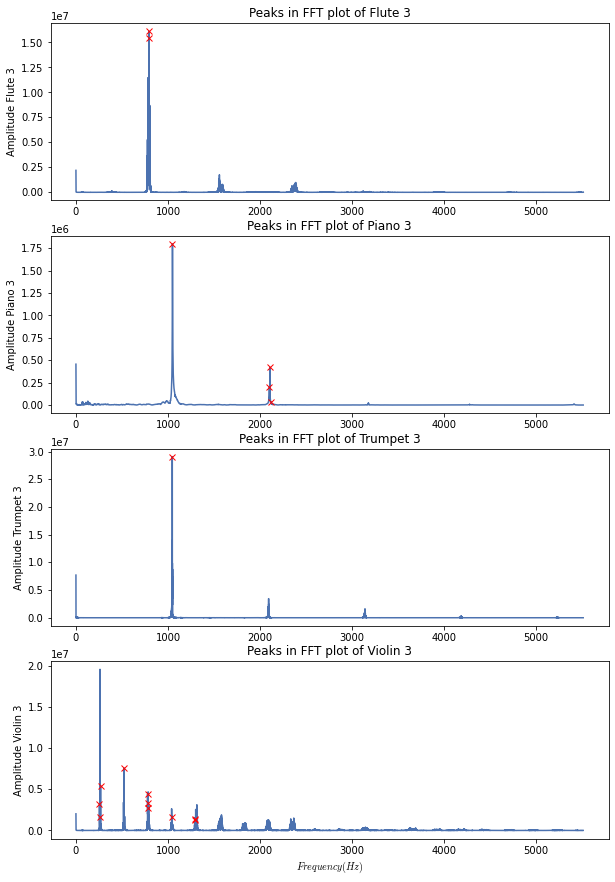

In [24]:
plt.figure(figsize=(10, 15))

fundamental_freq("Flute 3", 1, s_flute3, Fs, 5e6)
fundamental_freq("Piano 3", 2, s_piano3, Fs, 1e4)
fundamental_freq("Trumpet 3", 3, s_trumpet3, Fs, 5e6)
fundamental_freq("Violin 3", 4, s_violin3, Fs, 1e6)
plt.xlabel("$Frequency (Hz)$")

In [25]:
# Loading the data
Fs, s_flute1 = get_signal('flute1.wav')
Fs, s_flute2 = get_signal('flute2.wav')
Fs, s_flute3 = get_signal('flute3.wav')
Fs, s_flute4 = get_signal('flute4.wav')

sampling rate: 11025Hz
sampling rate: 11025Hz
sampling rate: 11025Hz
sampling rate: 11025Hz


In [26]:
# Finding the frequency value for each fft spectrum
def fundamental_freq(instrument, sbplot, s, Fs, threshold):
  plt.subplot(5, 1, sbplot)
  plt.title("Peaks in fft curve of " + instrument)
  N, X = plot_spec(instrument, s, Fs, Fs/2)
  peaks, _ = find_peaks(X, threshold= threshold)
  plt.plot(N[peaks], X[peaks], 'rx')
  print("Fundamental frequency of " + instrument + " is = " + str(N[peaks[0]]))

Fundamental frequency of Flute 1 is = 1045.2
Fundamental frequency of Flute 2 is = 262.4710344827586
Fundamental frequency of Flute 3 is = 793.5040268456376
Fundamental frequency of Flute 4 is = 523.8
Fundamental frequency of Piano 3 is = 1048.3772727272728


Text(0.5, 0, '$Frequency (Hz)$')

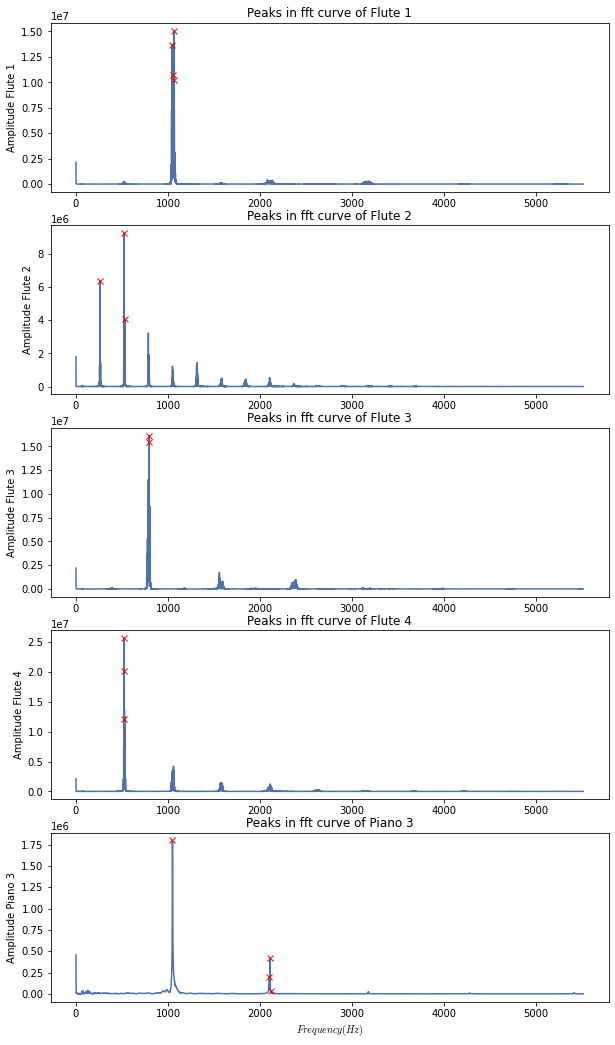

In [28]:
plt.figure(figsize=(10, 18))

fundamental_freq("Flute 1", 1, s_flute1, Fs, 5e6)
fundamental_freq("Flute 2", 2, s_flute2, Fs, 1e6)
fundamental_freq("Flute 3", 3, s_flute3, Fs, 5e6)
fundamental_freq("Flute 4", 4, s_flute4, Fs, 5e6)
fundamental_freq("Piano 3", 5, s_piano3, Fs, 1e4)
plt.xlabel("$Frequency (Hz)$")

## Problem 2

In [29]:
def get_signal2(filename):
  Fs, s = wavfile.read(filename)
  print('sampling rate: {}Hz'.format(Fs))
  IPython.display.Audio(s[:, 0], rate=Fs)
  return Fs, s[:, 0]

In [30]:
Fs_sound, s1 = get_signal2('soundtrack1.wav')
Fs_sound, s2 = get_signal2('soundtrack2.wav')
Fs_sound, s3 = get_signal2('soundtrack3.wav')
Fs_sound, sref = get_signal2('soundtrack1.wav')

sampling rate: 48000Hz
sampling rate: 48000Hz
sampling rate: 48000Hz
sampling rate: 48000Hz


In [58]:
# Finding the frequency value for each fft spectrum
def fundamental_freq(instrument, sbplot, s, Fs, threshold):
  plt.subplot(4, 1, sbplot)
  plt.title("Peaks in fft curve of " + instrument)
  N, X = plot_spec(instrument, s, Fs, Fs/2)
  peaks, _ = find_peaks(X, threshold= threshold)
  plt.plot(N[peaks], X[peaks], 'rx')
  print("Fundamental frequency of " + instrument + " is = " + str(N[peaks[0]]))
  return N[peaks[0]]

Fundamental frequency of Reference Signal is = 196.18055555555554
Fundamental frequency of Sound Track 1 is = 196.18055555555554
Fundamental frequency of Sound Track 2 is = 247.1846846846847
Fundamental frequency of Sound Track 3 is = 293.89312977099235


Text(0.5, 0, '$Frequency (Hz)$')

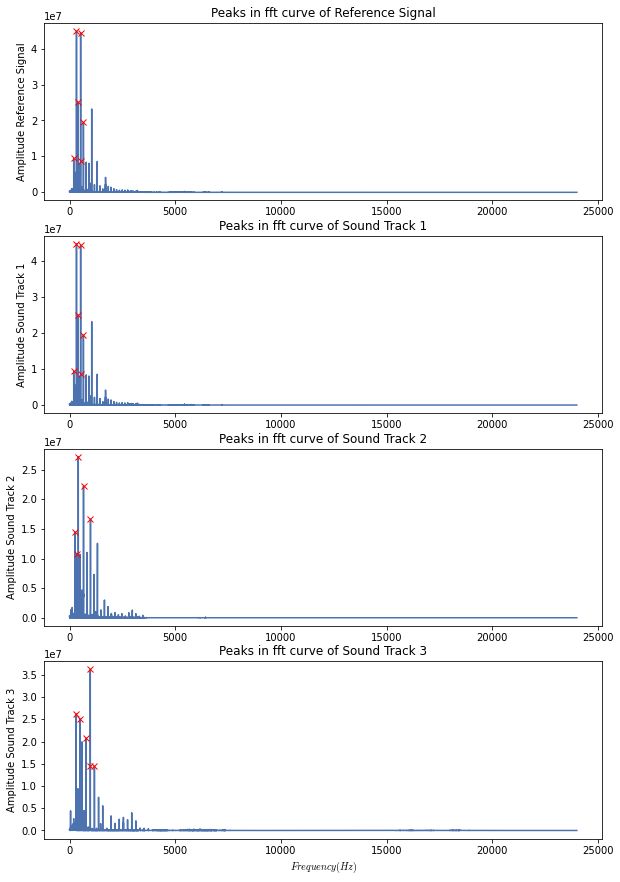

In [59]:
plt.figure(figsize=(10, 15))

ref_freq = fundamental_freq("Reference Signal", 1, sref, Fs_sound, 5e6)
s1_freq = fundamental_freq("Sound Track 1", 2, s1, Fs_sound, 5e6)
s2_freq = fundamental_freq("Sound Track 2", 3, s2, Fs_sound, 5e6)
s3_freq = fundamental_freq("Sound Track 3", 4, s3, Fs_sound, 5e6)
plt.xlabel("$Frequency (Hz)$")

In [60]:
# Creating Key Lock System
def checkSound(freq, ref):
  if abs(freq - ref)/freq <= 0.05:
    print("ACCESS GRANTED")
  else:
    print("ACCESS DENIED")

In [61]:
checkSound(s1_freq, ref_freq)
checkSound(s2_freq, ref_freq)
checkSound(s3_freq, ref_freq)

ACCESS GRANTED
ACCESS DENIED
ACCESS DENIED


## Problem 3

In [35]:
FsOpera, sOpera = get_signal('Opera.wav')
IPython.display.Audio(sOpera, rate=FsOpera)

sampling rate: 44100Hz


In [36]:
# Finding the frequency value for each fft spectrum
def fundamental_freq_Opera(instrument, s, Fs, threshold):
  plt.title("Peaks in fft curve of " + instrument)
  N, X = plot_spec(instrument, s, Fs, Fs/2)
  peaks, _ = find_peaks(X, threshold= threshold)
  plt.plot(N[peaks], X[peaks], 'rx')
  print("Fundamental frequency of " + instrument + " is = " + str(N[peaks[0]]))
  return N, X

Fundamental frequency of Opera is = 481.2


Text(0.5, 0, '$Frequency (Hz)$')

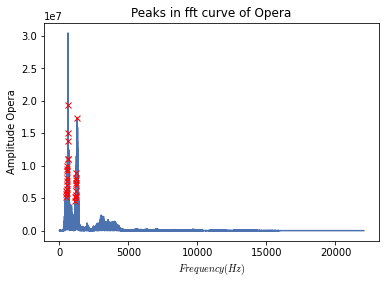

In [38]:
N, X = fundamental_freq_Opera("Opera", sOpera, FsOpera, 3e6)
plt.xlabel("$Frequency (Hz)$")

In [62]:
def plotOpera(sbplot, left, right, N, X):
  plt.subplot(5, 2, sbplot)
  plt.plot(N[left:right], X[left:right], label=r"Sample ("+str(left)+", "+str(right)+")")
  plt.ylabel("Amplitude")
  plt.xlabel("Frequency")
  plt.legend()

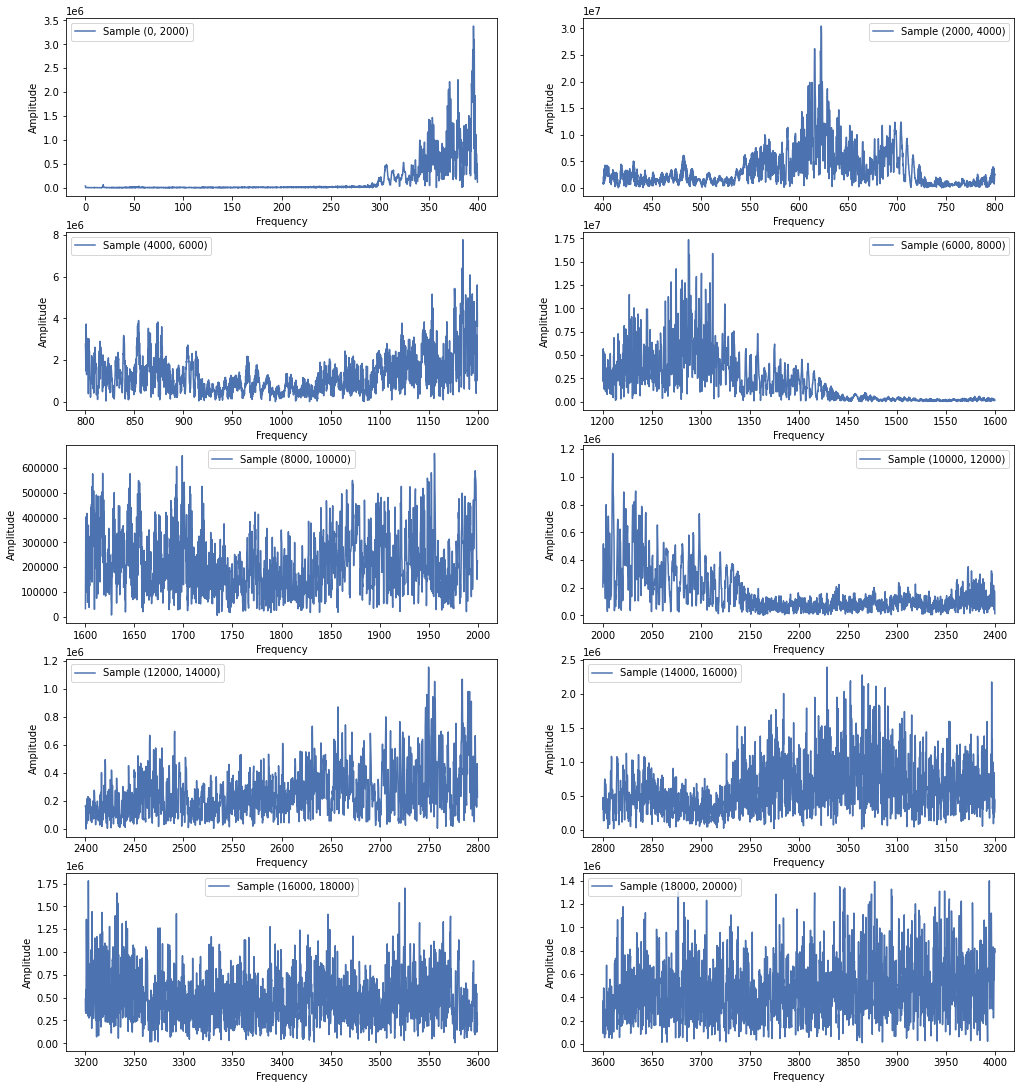

In [63]:
plt.figure(figsize=(17, 19))

for i in range(1, 11):
  plotOpera(i, (i-1)*2000, i*2000, N, X)

# k/N = F/Fs

110250